![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 5: Erros parciais e erros totais

# Parte 1: Método do retângulo

Para calcular uma aproximação para uma integral,
o método do retângulo divide o intervalo de integração em $N$ intervalos $I_i = [x_i,x_{i+1}]$,
com $i=0,\ldots,N-1$.
O erro parcial no intervalo $I_i$ é definido como a diferença entre a aproximação do método do retângulo
e a integral exata neste intervalo.

## Questão 1: Todos os termos do método do retângulo

Para estudarmos as propriedades dos erros parciais,
implemente a função `rect_parcs(f, a, b, N)`,
que integra a função `f` de `a` até `b` pelo método do retângulo,
utilizando `N` intervalos,
que retorna:
- uma lista (ou `np.array`) com os pontos iniciais dos intervalos utilizados; e
- uma lista (ou `np.array`) com a aproximação da integral em cada intervalo.

### Observação

Decidi implementar os algoritimos usados no teste nativamente, sem usar numpy,
de modo que tivesse incerteza que entendi o que escrevi. Algoritimos com numpy
são escritos em seguida meramente pra demonstrar que fiz dos dois jeitos.

In [2]:
def rect_parcs(f, a, b, N, left=True):
    '''Calcula a integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a altura dos retângulos pela esquerda se left == True
    ou direita se left == False'''
    xs = []
    parcs = []
    dx = (b - a) / N
    for i in range(0 if left else 1, N if left else N + 1):
        xi = a + i*dx
        xs.append(xi)
        parcs.append(f(xi)*dx)

    return xs, parcs

In [3]:
def rect_parcs_np(f, a, b, N):
    '''Calcula a integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a altura dos retângulos pela esquerda'''
    xs = np.linspace(a, b, N, endpoint=False)
    parcs = f(xs)*(b - a)/ N
    return xs, f(xs)*(b - a)/ N

In [4]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs),1,atol=1e-2)

In [5]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 10000)

assert len(xs) == len(parcs) == 10000
assert np.isclose(np.sum(parcs),1,atol=1e-4)

In [6]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert xs[-1]+xs[1]-xs[0] == 1

## Questão 2: Testando com o seno

Vamos trabalhar com a função $\sin(x)$.
Para comparar com a integral exata,
você vai precisar de uma função `int_sin(a,b)` que calcule o valor exato de $\int\limits_{a}^{b}\sin(x)dx$.

In [7]:
def int_sin(a, b):
    return np.cos(a) - np.cos(b)

In [8]:
assert int_sin(1,2) == -int_sin(2,1)
assert int_sin(3,3) == 0
assert np.isclose(int_sin(-np.pi/2,0),-1)

Calcule a integral de $\sin(x)$ de $0$ até $\pi$, usando 15 divisões pelo método do retângulo,
e faça um gráfico mostrando o erro parcial em cada intervalo em função do ponto inicial de cada intervalo.

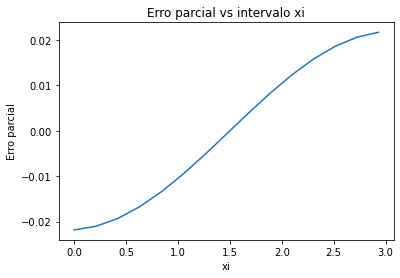

In [9]:
a, b = 0, np.pi
number_of_rects = 15
xs, parcs = rect_parcs(np.sin, a, b, number_of_rects, left=True)
dx = xs[1] - xs[0]

errs = []
for i in range(len(xs)):
    xi = xs[0] + i*dx
    err = np.sin(xi)*dx - int_sin(xi, xi + dx)
    errs.append(err)

plt.plot(xs, errs)
plt.title("Erro parcial vs intervalo xi")
plt.xlabel("xi")
plt.ylabel("Erro parcial")
plt.show()

Explique o gráfico acima. O formato deste gráfico te lembra alguma coisa?

Sim, o gráfico se assemelha ao de uma função do tipo $-Acos(x)$. Pode-se revelar essa relação a partir da manipulação algébrica da função do erro. Sabe-se que a definição de erro parcial é:

$ErrP(x_i) = sen(x_i)dx - cos(x_i) + cos(x_i + dx)$

É possível expressar essa função como: $Erro(x_i) = Asen(x_i) + Bcos(x_i)$

Se se manipula algebricamente a primeira expressão, obtem-se que: $ErrP(x_i) = (dx-sen(dx))sen(x_i) + (cos(dx) - 1)cos(x_i)$

Portanto $A = dx - sen(dx)$ e $B = cos(dx) - 1$

Aplica-se então a série de Mclaurin (série de Taylor em torno de x = 0) das funções $sen(dx)$ e $cos(dx)$, obtendo que:

$ErrP(x_i) = (dx-(dx - \frac{dx^3}{3!}  + ...))sen(x_i) + ((1-\frac{dx^2}{2!}+...) - 1)cos(x_i)$. Se os termos restantes da série são desperazados para $dx \to 0$, tem-se a seguinte aproximação:

$ErrP(x_i) \approx -\frac{dx^2}{2}cos(x_i) -\frac{dx^3}{6}sen(x_i)  - ...$, que pode ser escrito como $ErrP(x_i) = -\frac{dx^2}{2}cos(x_i) + o(dx^2)$, onde considera-se o sinal positivo por convenção e a notação com "$o$" indica que $\lim_{dx \to 0}o(dx^2) = 0$ 

Então nota-se que à medida que $dx$ tende a $0$, o termo $\frac{dx^2}{2}cos(x_i)$ domina, revelando a relação do erro parcial com a função $-Acos(x)$ para $A = \frac{dx^2}{2}$


## Questão 3: Variando `N`

Repita o experimento acima para `N` $=10,100$ e $1000$, fazendo três gráficos lado a lado.

Sugestão: escreva uma função `errs_rect(f, a, b, N, int_f)`
que calcula os erros de integração de $f$,
dado o intervalo $[a,b]$, o número de subdivisões $N$
e uma função `int_f` que retorna a integral analítica (como `int_sin`).

In [10]:
def errs_rect(f, a, b, N, int_f):
    '''Calcula os erros parciais da integral de f(x) para x pertencente ao intervalo
    [a, b] e N intervalos igualmente espaçados, aproximando a altura dos retângulos pela esquerda.
    O erro parcial em um intervalo é calculado como a diferença entre a integral numérica e a
    integral real (calculada com int_f) naquele intervalo'''
    xs = []
    errs = []
    dx = (b - a) / N
    for i in range(N):
        xi = a + i*dx
        xs.append(xi)
        err = f(xi)*dx - int_f(xi, xi + dx)
        errs.append(err)

    return xs, errs

In [11]:
def errs_rect_np(f, a, b, N, int_f):
    '''Calcula os erros parciais da integral de f(x) para x pertencente ao intervalo
    [a, b] e N intervalos igualmente espaçados, aproximando a altura dos retângulos pela esquerda.
    O erro parcial em um intervalo é calculado como a diferença entre a integral numérica e a
    integral real (calculada com int_f) naquele intervalo'''
    def np_int_f(a, b):
        '''Garante que a função int_f pode ser chamada com arrays do numpy'''
        np_a = np.asarray(a)
        np_b = np.asarray(b)
        return int_f(np_a, np_b)
    
    xs = np.linspace(a, b, N, endpoint=False)
    dx = (b - a) / N
    errs = f(xs)*dx - np_int_f(xs, xs + dx)
    return xs, errs

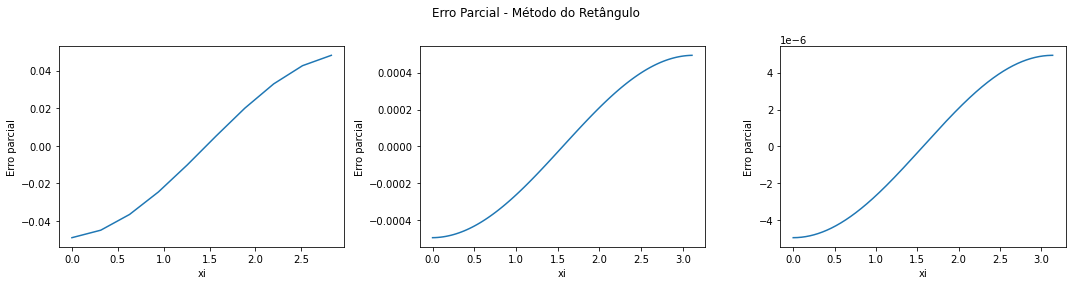

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

a, b = 0, np.pi
num_divs = [10, 100, 1000]
for i, N in enumerate(num_divs):
    xs, errs = errs_rect(np.sin, a, b, N, int_sin)
    ax = axs[i]
    ax.plot(xs, errs)
    ax.set_xlabel("xi")
    ax.set_ylabel("Erro parcial")

fig.suptitle("Erro Parcial - Método do Retângulo")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

Comente. Como os erros parciais variam em função do número de divisões do intervalo?

Como comentado na parte discursiva da Questão 2, para valores baixos de dx, o erro parcial será dado por $ErrP(x) = -\frac{dx^2}{2}cos(x_i) + o(dx^2)$. 

Partindo-se de $dx = \frac{b-a}{N}$ e que, na análise em questão, $b$ e $a$ se mantém constantes como $\frac{\pi}{2}$ e $0$, respectivamente, tem-se, da definição de $dx$, que à medida que $N \to \infty$, $dx \to 0$ e $ErrP(x_i) \to -\frac{dx^2}{2}cos(x_i)$

Portanto à medida que aumentamos o número de divisões do intervalo, tendemos a diminuir os erros parciais.

Vamos definir o $i$-ésimo erro total como a soma dos erros parciais dos intervalos $I_1$, $I_2$, até $I_i$.

Faça mais um gráfico triplo, para os mesmos valores de `N`,
desta vez mostrando o $i$-ésimo erro total em função do final do $i$-ésimo intervalo.

Dica: `np.cumsum`

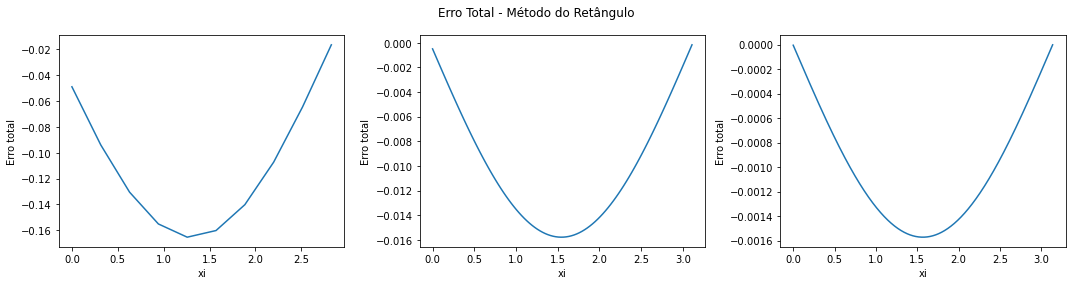

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

a, b = 0, np.pi
num_divs = [10,100,1000]
for i, N in enumerate(num_divs):
    xs, errs = errs_rect(np.sin, a, b, N, int_sin)
    total_errs = np.cumsum(errs)
    ax = axs[i]
    ax.plot(xs, total_errs)
    ax.set_xlabel("xi")
    ax.set_ylabel("Erro total")

fig.suptitle("Erro Total - Método do Retângulo")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

O formato destes gráficos te lembra alguma coisa?

Uma função do tipo $f(x) = -Asen(x)$

Os erros totais diminuem ou aumentam quando o número de divisões do intervalo aumenta? Na mesma proporção que os erros parciais? Porquê?

Sabe-se que o erro total do Método do Retângulo será o somatório dos erros parciais, isto é:
$ErrTotal = $ $\sum_{i=0}^{N} ErrP(x_i)$. Sabendo a expressão de $ErrP(x_i)$, podemos expressar esse erro como:

$ErrTotal = $ $\sum_{i=0}^{N} -\frac{dx^2}{2}cos(x_i) + \sum_{i=0}^{N} o(dx^2)$

Pela definição da notação $o$, constata-se que quando $dx \to 0$, o segundo termo $\sum_{i=0}^{N} o(dx^2)$ também tenderá a 0 e portanto será desprezível. Para o primeiro termo, sabe-se que é possível expressar $ \sum_{i=0}^{N} -cos(x_i)dx $ como $\int\limits_a^b sen(x)dx$, já que $\frac{d}{dx} sen(x) = -cos(x) + o(1)$, onde $o(1)$ é um erro que tende a 0 quando dx tende a 0 e com a ressalva de que $\frac{d}{dx} sen(x)$ não seja um valor indefinido no intervalo em que está sendo calculado. Calcula-se então a integral em questão para $a = 0$ e $b = x$, de onde vem que:

$ \sum_{i=0}^{N} -\frac{dx^2}{2}cos(x_i) = \frac{-dx}{2} (sen(x) - sen(0)) $ = $\frac{-dx}{2}sen(x)$

Revelando dessa vez a relação do erro total com a função $-Asen(x)$ para $A = \frac{dx^2}{2}$

# Parte 2: Método do trapézio

Vamos repetir a análise para o método do trapézio.

## Questão 4: Termos do trapézio

Primeiro, defina a função `trap_parcs(f, a, b, N)`, nos mesmos moldes de antes.

In [14]:
def trap_parcs(f, a, b, N):
    '''Calcula a integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a área em cada intervalo com um trapézio'''
    xs = []
    parcs = []
    dx = (b - a) / N
    for i in range(N):
        xi = a + i*dx
        xs.append(xi)
        parcs.append((f(xi+dx) + f(xi))*dx / 2)

    return xs, parcs

In [15]:
def trap_parcs_np(f, a, b, N):
    '''Calcula a integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a área em cada intervalo com um trapézio'''
    xs = np.linspace(a, b, N, endpoint=False)
    dx = (b - a) / N
    parcs = (f(xs + dx) + f(xs))*dx / 2
    return xs, parcs

In [16]:
def f(x): return x**2
xs, parcs = trap_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs), 1/3, atol=1e-4)

## Questão 5: Gráficos

Faça o gráficos dos erros parciais para o seno, variando o número de divisões do intervalo de integração.

In [17]:
def errs_trap(f, a, b, N, int_f):
    '''Calcula os erros parciais da integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a área em cada intervalo com um trapézio.
    O erro parcial em um intervalo é calculado como a diferença entre a integral numérica e a
    integral real (calculada com int_f) naquele intervalo'''
    xs = []
    errs = []
    dx = (b - a) / N
    for i in range(N):
        xi = a + i*dx
        xs.append(xi)
        err = (f(xi+dx) + f(xi))*dx / 2 - int_f(xi, xi + dx)
        errs.append(err)

    return xs, errs

In [18]:
def errs_trap_np(f, a, b, N, int_f):
    '''Calcula os erros parciais da integral de f(x) para x pertencente ao intervalo
    [a, b], aproximando a área em cada intervalo com um trapézio.
    O erro parcial em um intervalo é calculado como a diferença entre a integral numérica e a
    integral real (calculada com int_f) naquele intervalo'''
    def np_int_f(a, b):
        '''Garante que a função int_f pode ser chamada com arrays do numpy'''
        np_a = np.asarray(a)
        np_b = np.asarray(b)
        return int_f(np_a, np_b)
    
    xs = np.linspace(a, b, N, endpoint=False)
    dx = (b - a) / N
    errs = (f(xs + dx) + f(xs))*dx / 2 - int_f(xs, xs + dx)
    return xs, errs

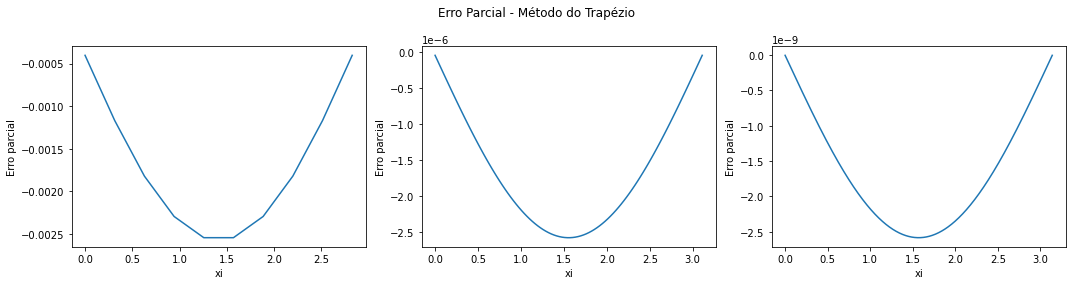

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

a, b = 0, np.pi
num_divs = [10,100,1000]
for i, N in enumerate(num_divs):
    xs, errs = errs_trap(np.sin, a, b, N, int_sin)
    ax = axs[i]
    ax.plot(xs, errs)
    ax.set_xlabel("xi")
    ax.set_ylabel("Erro parcial")

fig.suptitle("Erro Parcial - Método do Trapézio")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

Comente. O que mudou dessa vez?

O valor, em módulo, dos erros diminuiu consideravelmente para os três gráficos com valores para diferentes valores de dx, mas teve sua forma alterada (sendo mais similar a um gráfico do tipo $-Asen(x)$. Pode-se evidenciar essa relação seguinto o mesmo procedimento da questão 2, mas considerando a fórmula usada para o método do trapézio:

$ErrP(x_i) = (sen(x_i + dx) + sen(x_i))\frac{dx}{2} - cos(x_i) + cos(x_i + dx)$

Manipulando e expressando as funções com a expansão pela série de Taylor, obtem-se que:
$ErrP(x_i) = \frac{dx^3}{12} sen(\frac{x_i +x_i+1}{2}) + o(dx^3)$

Seg
Então nota-se que à medida que $dx$ tende a $0$, o termo $\frac{dx^2}{12}sen(\frac{x_i +x_i+1}{2})$ domina, revelando a relação do erro parcial com a função $-Asen(x)$ para $A = \frac{dx^3}{12}$


Agora faça o gráficos dos erros totais variando o número de divisões do intervalo de integração.

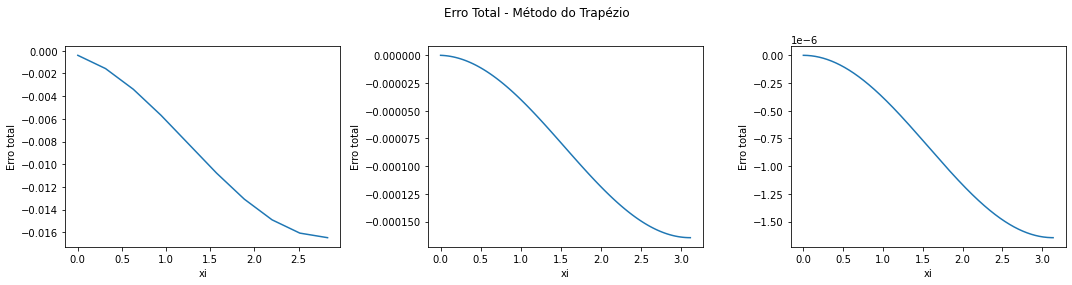

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

a, b = 0, np.pi
num_divs = [10,100,1000]
for i, N in enumerate(num_divs):
    xs, errs = errs_trap(np.sin, a, b, N, int_sin)
    total_errs = np.cumsum(errs)
    ax = axs[i]
    ax.plot(xs, total_errs)
    ax.set_xlabel("xi")
    ax.set_ylabel("Erro total")

fig.suptitle("Erro Total - Método do Trapézio")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

Comente o gráfico, relacionando com os gráficos vistos anteriormente.

Segue-se o raciocínio da questão 3 com $ErrTotal = $ $\sum_{i=0}^{N} ErrP(x_i)$ tendo $ErrTotal = $ $\sum_{i=0}^{N} -\frac{dx^3}{12}sen(\frac{x_i + x_i+1}{2}) + \sum_{i=0}^{N} o(dx^3)$

De onde tem-se que:

$ErrTotal \approx  \sum_{i=0}^{N} -\frac{dx^3}{12}sen(\frac{x_i + x_i+1}{2}) = \frac{-dx^2}{12} (cos(x) - cos(0)) $ = $\frac{-dx^2}{12}(cos(x) - 1)$

Que é coerente com o apresentado pelos gráficos. Comparando esses gráficos com os obtidos pelo método do retângulo, nota-se uma grande diminuição do erro e o mesmo comportamento de diminuição do erro à medida em que se diminui $dx$.

## Questão 6: Retângulo e Trapézio

Vamos "transpor" os gráficos:
Para cada ponto $x_i = \pi/4$, $\pi/3$ e $\pi/2$,
faça um gráfico do erro de integração no intervalo $[x_i, x_i + h]$ em função de $h$,
variando de $\pi/10$ a $\pi/1000$.

Faça 2 curvas em cada gráfico: uma para o método do retângulo, e outra para o do trapézio.
Não esqueça de incluir títulos e legendas!

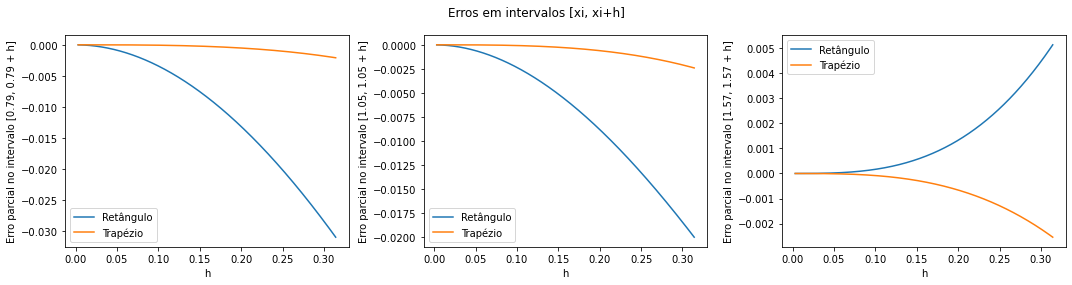

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
xs = np.pi * np.array([1/4, 1/3, 1/2])
hs = np.linspace(np.pi/1000, np.pi/10, num=1000)

for i, xi in enumerate(xs):
    a, N = xi, 1
    rect_errs, trap_errs = [], []
    for h in hs:
        b = a + N*h
        rect_errs.append(errs_rect(np.sin, a, b, N, int_sin)[1][-1])
        trap_errs.append(errs_trap(np.sin, a, b, N, int_sin)[1][-1])
    
    ax = axs[i]
    ax.plot(hs, rect_errs, '-', label = 'Retângulo')
    ax.plot(hs, trap_errs, label="Trapézio")
    ax.set_xlabel("h")
    rounded_xi = round(xi, 2)
    ax.set_ylabel(f"Erro parcial no intervalo [{rounded_xi}, {rounded_xi} + h]")
    ax.legend(loc=0)

fig.suptitle("Erros em intervalos [xi, xi+h]")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

O que você observa nestes gráficos?

Antes de fazer as observações, é importante elucidar algumas das minhas intuições sobre o funcionamento dos métodos de integração numérica. No contexto desse teste, a integração constitui em dividir a função contínua a ser integrada $f(x)$ no domínio $[a, b]$ em um número N de intervalos $[xi, xi + h]$. Geometricamente, isso significa dividir a função como um somatório de áreas de largura $h$ em cada intervalo onde, no método do retângulo, essa área será um retângulo de altura $f(xi)$ (para aproximações pela esquerda) ou $f(xi + h)$ (para aproximações pela direita) e, no método do trapézio, um trapézio de base maior $max([f(xi), f(xi + g)]$ e base menor $min([f(xi), f(xi + h)])$

Para ambos casos, a ideia é interpolar a função $f(x)$ no intervalo $[xi, xi + h]$ com uma forma geométrica que provavelmente não vai ser equivalente à função em si (pois ela provavelmente não será um trapézio ou retângulo naquele intervalo). Os erros do método, então, podem ser pensados como em parte provenientes dessa interpolação infidedigna. À medida que diminuímos o valor de $h$, a interpolação tende a ser melhor (pois na média dos intervalos $[xi, xi + h]$ utilizados, há menos "espaço" para a função $f(x)$ ter um formato muito diferente de um retângulo ou trapézio).

Com essas intuições em perspectiva, separamos as observações sobre os gráficos em tópicos:

1) Como esperado, o erro converge a zero à medida que diminuímos h nos dois métodos e, mesmo para um valor mínimo de h de $\frac{\pi}{1000}$, erros de aritmética do ponto flutuante não se manifestam.
Explicação: quando diminúimos h, tendemos a ter interpolações mais fidedignas da função f(x) em cada intervalo;

2) À medida que h se distancia de 0, os erros do método do retângulo são sempre maiores do que no método do trapézio e a diferença se torna cada vez maior à medida que h aumenta.
Explicação: uma interpolação com um trapézio tende a ser melhor que uma interpolação com um retângulo. Em certo sentido, isso ocorre pois usando o trapézio temos mais informações sobre a função no intervalo em questão;

3) O valor, em módulo, do erro em função de h é menor no gráfico no intervalo $[\frac{\pi}{2}, \frac{\pi}{2} + h]$ (mais à direita) e maior no gráfico do intervalo $[\frac{\pi}{4}, \frac{\pi}{4} + h]$ (mais à esquerda).
Explicação: para a função $f(x) = sen(x)$ no domínio $[0, \frac{\pi}{2}]$, a derivada $cos(x)$ aumenta à medida que aumentamos $x$ e as interpolações com retângulo ou trapézio nos intervalos $[xi, xi + h]$ tendem a ser piores quanto mais a função muda no intervalo (não se limitando à derivada, mas principalmente por sua causa).